# Example 11-13: Non-linear system of ODEs

At this point, we hope you're feeling confident and proud of all that you've learned so far.
To showcase the power of these numerical tools, we will now solve a system of non-linear ODEs, which would be rather nasty to do by hand.
In fact, we will even do it in _polar coordinates_!

## Summary of commands

- [Polar plots](https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_demo.html) in Matplotlib.
  This requires a bit of fancy styling and coding savviness.

## Planetary motion

Consider a planet orbiting the sun.
The set of parameteric equations describing the motion in terms of $r(t)$ and $\theta(t)$ are:

$$ \begin{align}
r'' - (\theta')^2 r &= -\frac{4\pi^2}{r^2} \\
r \theta'' + 2r' \theta' &= 0
\end{align} $$

or

$$ \begin{align}
r'' &= (\theta')^2 r  -\frac{4\pi^2}{r^2} \\
\theta'' &= - \frac{2r' \theta'}{r}
\end{align} $$

If we make the following transformation, we get a new system of four 1st-order ODEs:

$$ \begin{alignat}{2}
r       &= y_1 \quad &&\implies \quad y_1' &&= y_3 \\
\theta  &= y_2 \quad &&\implies \quad y_2' &&= y_4 \\
r'      &= y_3 \quad &&\implies \quad y_3' &&= y_1 y_4^2 - \frac{4\pi^2}{y_1^2} \\
\theta' &= y_4 \quad &&\implies \quad y_4' &&= -2 \frac{y_3 y_4}{y_1}
\end{alignat} $$

The initial conditions are:

$$ r(0) = 2; \quad \theta(0) = 0; \quad r'(0) = 0; \quad \theta'(0) = \text{input} $$

where $\theta'(0)$ is an input parameter from the user.
We will solve this system for a range of $\theta'(0)$ values; namely, $\theta'(0) = \begin{bmatrix} 1.5, & \pi/\sqrt{2}, & 2.8, & 3.39 \end{bmatrix}$.

```{admonition} Note about polar plots
Since the problem is in polar coordinates, it makes sense to plot the result on a polar plot, $(r, \theta)$.
Of course, creating such plots is not central to the course, and it's not expected that you learn precisely how to do this.
We demonstrate it below for those who are curious because it's pretty slick!
```

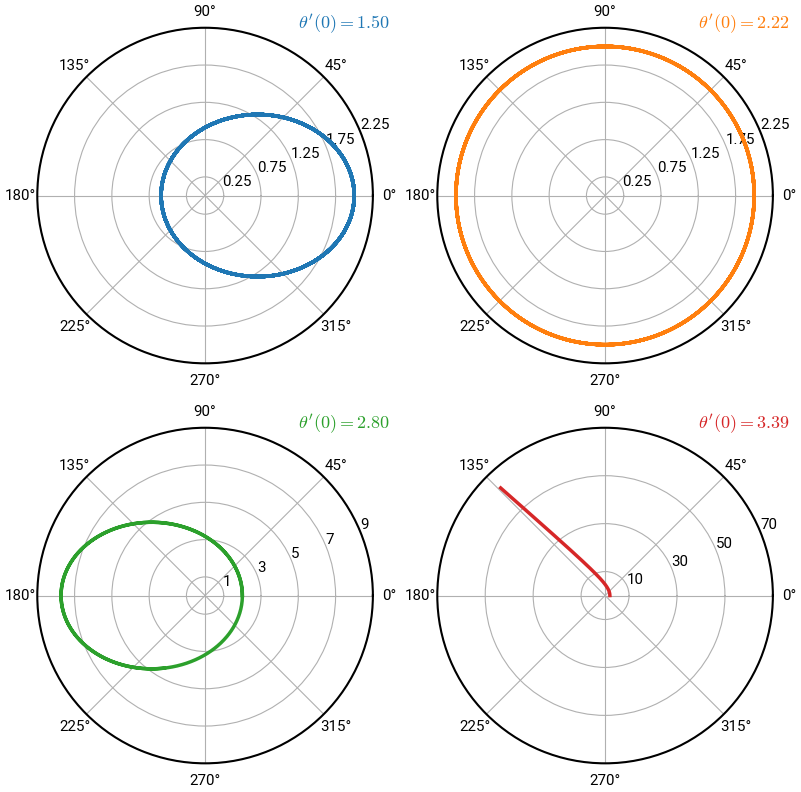

In [21]:
# import libraries
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# define custom function: z = [r, theta, r', theta']
def my_func(t, z):
    zp = np.zeros(4)
    zp[0] = z[2]
    zp[1] = z[3]
    zp[2] = z[0] * z[3] ** 2 - 4 * np.pi**2 / z[0]**2
    zp[3] = -2 * z[2] * z[3] / z[0]
    return zp

# constants
t0 = 0
tf = 20
r0 = 2
th0 = 0
rp0 = 0
thp0 = 1.5

# plot the solution
plt.rcParams.update({'lines.linewidth':2.5, 'font.size':13})
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8), 
                       subplot_kw={'projection': 'polar'}, layout='constrained')
thp0s = [1.5,  np.pi/np.sqrt(2), 2.8, 3.39]
for i,thp0 in enumerate(thp0s):
    solver = solve_ivp(my_func, [t0, tf], [r0, th0, rp0, thp0], max_step=0.01)
    t, z = solver.t, solver.y
    ax[i // 2, i % 2].plot(z[1,:], z[0,:], c=f"C{i}")       # getting fancy with the indexing!
    yticks = ax[i // 2, i % 2].get_yticks()      # reassign tick labels for greater clarity
    ax[i // 2, i % 2].set_yticks(yticks[::2])
    ax[i // 2, i % 2].annotate(rf"$\theta'(0) = {thp0:.2f}$", (1.05, 1.0), 
                               xycoords="axes fraction", ha='right', c=f"C{i}")
plt.show()